<a href="https://colab.research.google.com/github/vidongls/python_dulieu/blob/main/baithi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing as pp


In [ ]:
df_estonia = pd.read_csv("/content/estonia-passenger-list.csv")
print(df_estonia.head(10))
# print(df_estonia.describe(include='all'))
print(df_estonia.describe())
df_estonia = df_estonia.drop_duplicates()
df_estonia.isna().sum()
df_estonia.Survived.value_counts()
# categorical_features_indices = np.where(df_estonia.dtypes != np.int64)[0]
# for col in df_estonia.columns:
#     print(col, str(round(100* df_estonia[col].isnull().sum() / len(df_estonia), 2)) + '%')

   PassengerId  Country           Firstname  ... Age Category  Survived
0            1   Sweden         ARVID KALLE  ...  62        P         0
1            2  Estonia                 LEA  ...  22        C         0
2            3  Estonia                AIRI  ...  21        C         0
3            4   Sweden                JURI  ...  53        C         0
4            5   Sweden     BRITTA ELISABET  ...  55        P         0
5            6   Sweden  GERD INGA MAGNHILD  ...  71        P         0
6            7   Sweden             HJALMAR  ...  60        P         0
7            8  Estonia               PILLE  ...  18        P         0
8            9  Estonia               TORMI  ...  30        C         0
9           10   Sweden          ANNA MARIA  ...  63        P         0

[10 rows x 8 columns]
       PassengerId         Age    Survived
count   989.000000  989.000000  989.000000
mean    494.992922   44.575329    0.138524
std     285.643660   17.235146    0.345624
min       1.0

0    852
1    137
Name: Survived, dtype: int64

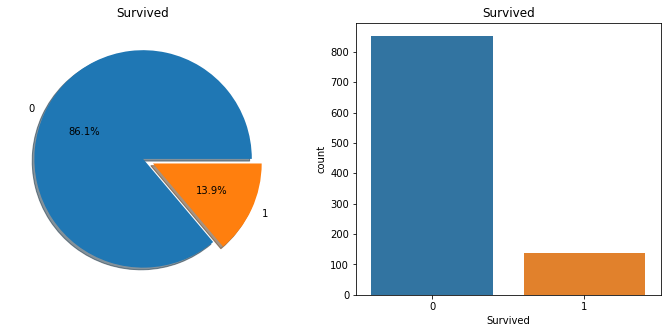

In [ ]:
# #vẽ biểu đồ hiển thị tỉ lệ sống sót
f,ax=plt.subplots(1,2,figsize=(12,5))
df_estonia['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=df_estonia,ax=ax[1])
ax[1].set_title('Survived')
plt.show()
# labels = ['Dead', 'Survived']
# values = df.Survived.value_counts().values
# import plotly.graph_objects as go
# fig = go.Figure(data=[go.Pie(labels=labels, textinfo='label+percent', values=values)])
# fig.show()

In [ ]:
#thêm cột age_category để phân loại các nhóm tuổi
Age=df_estonia['Age'].values
cage=[]
for i in Age:
    if i<=16:
        cage.append('Child')
    elif i<=60:
        cage.append('Adult')
    else:
        cage.append('Old Person')
df_estonia['Age_Category']=cage
print (df_estonia.head(10))

   PassengerId  Country           Firstname  ... Category Survived  Age_Category
0            1   Sweden         ARVID KALLE  ...        P        0    Old Person
1            2  Estonia                 LEA  ...        C        0         Adult
2            3  Estonia                AIRI  ...        C        0         Adult
3            4   Sweden                JURI  ...        C        0         Adult
4            5   Sweden     BRITTA ELISABET  ...        P        0         Adult
5            6   Sweden  GERD INGA MAGNHILD  ...        P        0    Old Person
6            7   Sweden             HJALMAR  ...        P        0         Adult
7            8  Estonia               PILLE  ...        P        0         Adult
8            9  Estonia               TORMI  ...        C        0         Adult
9           10   Sweden          ANNA MARIA  ...        P        0    Old Person

[10 rows x 9 columns]


Tỉ lệ sống sót của nhóm tuổi
{'Child': 0.15789473684210525, 'Adult': 0.17245989304812834, 'Old Person': 0.02252252252252252}
Tỉ lệ sống sót của từng quốc gia
{'Morocco': 0.0, 'Germany': 0.375, 'Canada': 0.0, 'Finland': 0.375, 'Norway': 0.3333333333333333, 'Nigeria': 0.0, 'France': 0.0, 'Estonia': 0.18604651162790697, 'Lithuania': 0.25, 'Sweden': 0.0890909090909091, 'Russia': 0.14285714285714285, 'Latvia': 0.21428571428571427, 'Denmark': 0.16666666666666666, 'Great Britain': 0.5, 'Netherlands': 0.5, 'Belarus': 0.0}
Tỉ lệ sống sót của giới tính
{'M': 0.21868787276341947, 'F': 0.05555555555555555}


<BarContainer object of 2 artists>

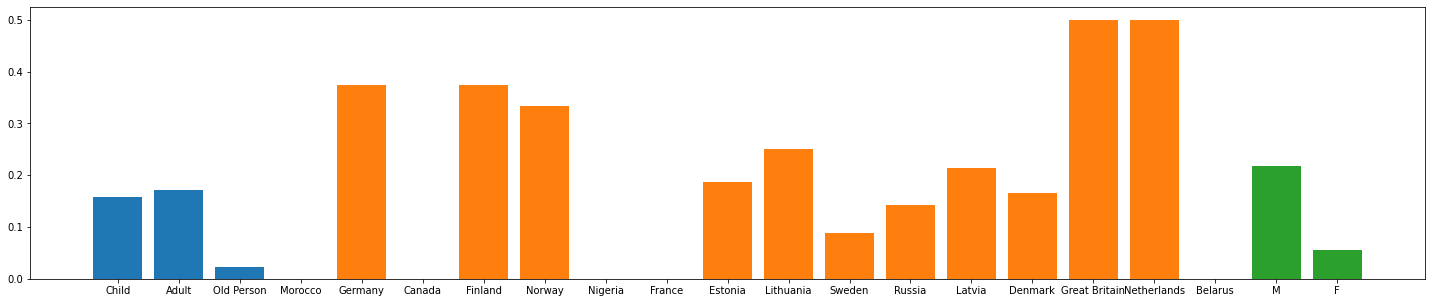

In [ ]:
groupAges={}
groupgt={}
nhomqgia={}
for i in ['Child','Adult','Old Person']:
    groupAges[i]=len(df_estonia[(df_estonia['Age_Category']==i) & (df_estonia['Survived']==1)].values)/len((df_estonia[df_estonia['Age_Category']==i] ).values)
for i in ['M','F']:
    groupgt[i]=len(df_estonia[(df_estonia['Sex']==i) & (df_estonia['Survived']==1)].values)/len((df_estonia[df_estonia['Sex']==i] ).values)
for i in set(list(df_estonia['Country'].values)):
    nhomqgia[i]=len(df_estonia[(df_estonia['Country']==i) & (df_estonia['Survived']==1)].values)/len((df_estonia[df_estonia['Country']==i] ).values)
f, ax = plt.subplots(figsize=(25,5)) # set the size that you'd like (width, height)
print("Tỉ lệ sống sót của nhóm tuổi")
print(groupAges)
print("Tỉ lệ sống sót của từng quốc gia")
print(nhomqgia)
print("Tỉ lệ sống sót của giới tính")
print(groupgt)
# print(df_estonia['Sex'].value_counts())
plt.bar(groupAges.keys(),groupAges.values())
plt.bar(nhomqgia.keys(),nhomqgia.values())
plt.bar(groupgt.keys(),groupgt.values())


In [ ]:
#gán vào df xử lý trên df
# đưa dữ liệu string qua int
df=df_estonia
df.drop(columns=['Firstname','Lastname','PassengerId'],inplace=True,axis=1)

print(df.head(10))
def makenum(text):
    dic={}
    count=0
    for i in set(list(df[text].values)):
        dic[i]=count
        count+=1
    df[text].replace(dic,inplace=True)
makenum('Country')
makenum('Sex')
makenum('Category')
makenum('Age_Category')

   Country Sex  Age Category  Survived Age_Category
0   Sweden   M   62        P         0   Old Person
1  Estonia   F   22        C         0        Adult
2  Estonia   F   21        C         0        Adult
3   Sweden   M   53        C         0        Adult
4   Sweden   F   55        P         0        Adult
5   Sweden   F   71        P         0   Old Person
6   Sweden   M   60        P         0        Adult
7  Estonia   F   18        P         0        Adult
8  Estonia   M   30        C         0        Adult
9   Sweden   F   63        P         0   Old Person


In [ ]:
#chuan hoa min-max
print("Chuẩn hoá min max")
mms = pp.MinMaxScaler()
data_mms = mms.fit_transform(df_estonia)
print(data_mms)
print("=============================")
print("Chính quy hoá")
#chinh quy hoa (standardisation)
print('Standardization')
std = pp.StandardScaler()
data_std = std.fit_transform(df_estonia)
print(data_std)
# #--- chuẩn hoá z-score
# print('=== Standardization z-score ==== ')
# std = pp.StandardScaler()
# data_std = std.fit_transform(df_estonia)
# print(data_std)
# #--- chuẩn hoá 3-sigma
# print('=== Standardization 3-sigma==== ')
# a_3sigma=(df_estonia-np.mean(df_estonia))/(3.0*np.std(df_estonia))
# print(a_3sigma)

Chuẩn hoá min max
[[0.6        0.         0.71264368 1.         0.         1.        ]
 [0.46666667 1.         0.25287356 0.         0.         0.        ]
 [0.46666667 1.         0.24137931 0.         0.         0.        ]
 ...
 [0.6        0.         0.88505747 1.         0.         1.        ]
 [0.6        1.         1.         1.         0.         1.        ]
 [0.6        0.         0.48275862 1.         1.         0.        ]]
Chính quy hoá
Standardization
[[ 0.51425222 -0.98295615  1.01150798  0.49240462 -0.40099641  1.83363256]
 [-0.73077947  1.01733938 -1.31050535 -2.03085015 -0.40099641 -0.56037748]
 [-0.73077947  1.01733938 -1.36855569 -2.03085015 -0.40099641 -0.56037748]
 ...
 [ 0.51425222 -0.98295615  1.88226299  0.49240462 -0.40099641  1.83363256]
 [ 0.51425222  1.01733938  2.46276632  0.49240462 -0.40099641  1.83363256]
 [ 0.51425222 -0.98295615 -0.14949868  0.49240462  2.4937879  -0.56037748]]


Accuracy Score: 0.8434343434343434
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       336
           1       0.00      0.00      0.00        60

    accuracy                           0.84       396
   macro avg       0.42      0.50      0.46       396
weighted avg       0.72      0.84      0.78       396

Kích thước tập Train =  (593, 5)
Kích thước tập Test =  (396, 5)
============Hệ số=============
Hệ số W: 
 [[-0.15113134 -1.78778762 -0.02551489 -0.65988461 -0.69735294]]
Hệ số Bias: 
 [1.59164986]
Ma trận kết quả dự đoán!
[[334   2]
 [ 60   0]]


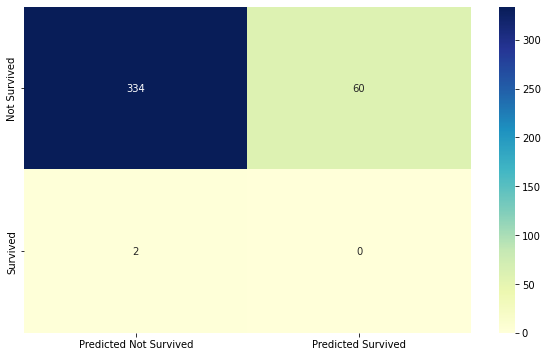

In [ ]:
X=df.drop(columns=['Survived'],axis=1).values
y=df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.40, random_state=0)
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression().fit(X_train,y_train)
y_pred1=model1.predict(X_test)
from sklearn.metrics import accuracy_score
#In ra kết quả độ chính xác
score1=accuracy_score(y_test, y_pred1)
print("Accuracy Score:", score1)
print("=============================")
# #In ra kết quả độ chính xác trên từng lớp
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))
# kích thước
print("=============================")
print ('Kích thước tập Train = ', X_train.shape)
print ('Kích thước tập Test = ',X_test.shape)
# hệ số mô hình
print("============Hệ số=============")
print('Hệ số W: \n', model1.coef_)
print('Hệ số Bias: \n', model1.intercept_)
#In ra ma trận kết quả dự đoán
print("=============================")
print("Ma trận kết quả dự đoán!")
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test,y_pred1)
print(confusion_matrix1)
#=================ve thu============
pred = model1.predict(X_test)
pred = (pred>0.14).astype(int)
cm = confusion_matrix(pred,y_test)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='g',cmap='YlGnBu',xticklabels=['Predicted Not Survived','Predicted Survived'],yticklabels=['Not Survived','Survived'])
#=================
# print("=============================")
# print("test \n",df[3:4]);
# test = model1.predict(X[2:3])
# print("kq",test)

In [ ]:
#dung svm
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
pred_4=svm.predict(X_test)
score_4=accuracy_score(y_test,pred_4)
print("Độ chính xác:",score_4)


Độ chính xác: 0.8484848484848485


Độ chính xác mà không thêm cột Age_category: 0.8383838383838383
Kích thước tập Train =  (593, 4)
Kích thước tập Test =  (396, 4)
Ma tran ket qua du doan!
[[332  60]
 [  4   0]]


[Text(0, 0.5, 'Not survived'), Text(0, 1.5, 'Survived')]

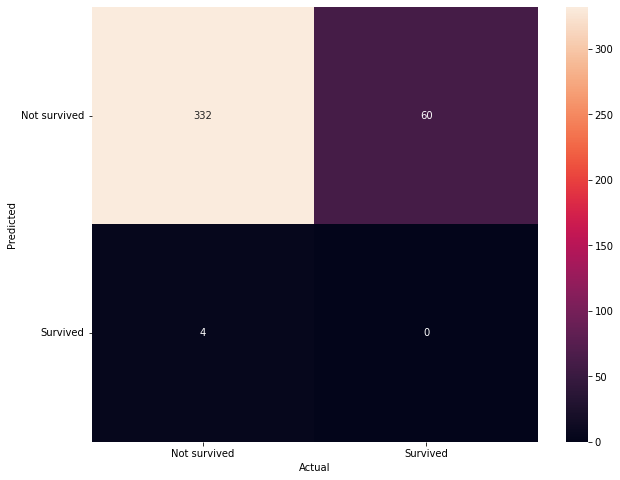

In [ ]:
#k them age_category
X=df.drop(columns=['Survived','Age_Category'],axis=1).values
y=df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.40, random_state=0)
model1.fit(X_train,y_train)
y_pre2=model1.predict(X_test)
print('Độ chính xác mà không thêm cột Age_category:',accuracy_score(y_pre2,y_test))
print("=============================")
print ('Kích thước tập Train = ', X_train.shape)
print ('Kích thước tập Test = ',X_test.shape)
#In ra ma trận kết quả dự đoán
print("Ma tran ket qua du doan!")
#========================
print("=============================")
from sklearn.metrics import confusion_matrix
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
conf_mat_log=confusion_matrix(y_pre2,y_test)
print(conf_mat_log)

sns.heatmap(conf_mat_log,annot=True,fmt='g',ax=ax)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.xaxis.set_ticklabels(['Not survived', 'Survived'])
ax.yaxis.set_ticklabels(['Not survived', 'Survived'],rotation=0)

In [ ]:
#xoa cot age
df.drop(columns=['Age'],axis=1,inplace=True)
X=df.drop(columns=['Survived'],axis=1).values
y=df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.40, random_state=0)
model1.fit(X_train,y_train)
y_hat3=model1.predict(X_test)
print('Độ chính xác khi không có cột Age:',accuracy_score(y_hat3,y_test))  


Độ chính xác khi không có cột Age: 0.8484848484848485


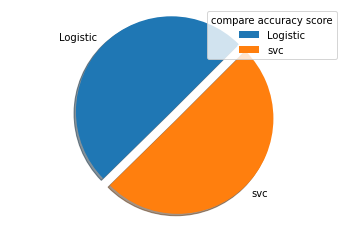

In [ ]:
firms = ["Logistic","svc"]
market_share=[score1,score_4]
Explode = [0,0.1]
plt.pie(market_share,explode=Explode,labels=firms,shadow=True,startangle=45)
plt.axis('equal')
plt.legend(title="compare accuracy score")
plt.show()